# LABB 2

## Using synthetic data and ML to solve the problem of differentiating between obese Pichus and Pikachus

### Objective
The purpose of this lab is to utilize the tools you have learned in Python to implement a simplified machine learning algorithm.

### Overview
In this lab, there is simulated data on the lengths and widths of Pichus and Pikachus. Your task is to create an algorithm that can classify a new data point as either Pichu or Pikachu based on the given data.

---

### Basic Task
Follow this flowchart to build the basic algorithm.
- Test Data Coordinates: `(25,32), (24.2,31.5), (22,34), (20.5,34)`

#### Expected Results
- Sample with (width, height): `(25, 32)` classified as Pikachu
- Sample with (width, height): `(24.2, 31.5)` classified as Pikachu
- Sample with (width, height): `(22, 34)` classified as Pikachu
- Sample with (width, height): `(20.5, 34)` classified as Pichu

---

### Additional Tasks
Complete these tasks once you have correctly classified the test data.
1. Allow the user to input a test point and have the algorithm determine its class.
    - Include error handling for negative numbers and non-numeric inputs. Make sure to provide user-friendly error messages.
2. The nearest-point approach we have used may misclassify when the points of each class overlap.
    - Now choose the ten nearest points to your test point.
    - The class of the test point is determined by majority voting among the nearest points.



### - 

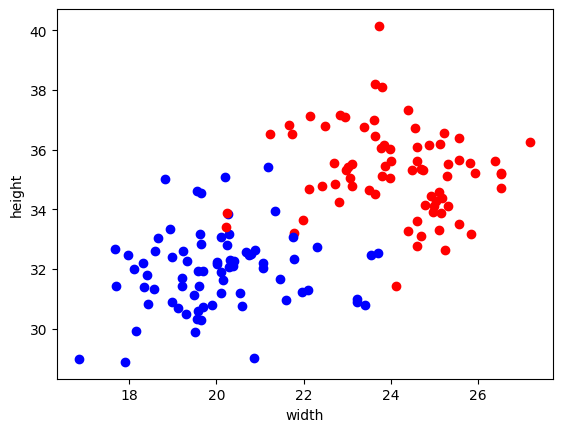

In [378]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sorted = [] # sorted list of data points

with open('resources/datapoints.txt', 'r') as datapoints:
    reader = csv.reader(datapoints, delimiter=',') # read the file datapoints.txt
    for row in reader:                       
        sorted.append(row)
    sorted = sorted[1:] 
    sorted = np.array(sorted).astype(float) # convert the data to a numpy array and convert the elements to float

for row in sorted:  #For each row in the sorted list, it checks the value of the third element (row[2]).
                        #If the value is 0, it plots a blue scatter point with a label "0-pichu".                       
                        #If the value is 1, it plots a red scatter point with a label "1-pikachu
    if row[2] == 0:                                  
        plt.scatter(row[0], row[1], c='b', label='0-pichu')
    elif row[2] == 1:
        plt.scatter(row[0], row[1], c='r', label='1-pikachu')



plt.xlabel('width')
plt.ylabel('height')
plt.show()

#### "inspirerad kod"
- https://stackoverflow.com/questions/4796764/read-file-from-line-2-or-skip-header-row - "sorted = [] # sorted list of data points"
- https://saturncloud.io/blog/how-to-plot-data-from-a-txt-file-using-matplotlib-a-guide-for-data-scientists/ en "for dummies"-guide som jag hade till hjälp.


In [385]:
reader = open('resources/testpoints.txt', 'r') # read the file testpoints.txt
testpoints = csv.reader(reader, delimiter=',')
testpoints = list(testpoints)
print(testpoints)

[['Test points:'], ['1. (25', ' 32)'], ['2. (24.2', ' 31.5)'], ['3. (22', ' 34)'], ['4. (20.5', ' 34)']]
